# ECM2423 Artificial Intelligence and Applications Coursework 700012512

# Question 1 | Implement a heuristic search algorithm: A⋆ and the 8-puzzle game.

Question 1.1: Describe how you would frame the 8-puzzle problem as a search problem

An 8-puzzle has states where a blank space and the numbers 1-8 populate a 3x3 grid in certain arrangements. Different states can be traversed by swapping the blank space with any adjacent numbered tiles. The swapping up, down, left and right can be modelled as operators in a search problem and there is a goal state present in the problem which can be searched for. The cost to reach the goal or specific states can be modelled as the total state transitions from a given initial state to the specified state.

The 8-puzzle problem may be framed as an informed heuristic search as there is only one goal state and the difference between the goal state and the other states can be used to find the goal state where the lower the difference is, the closer the state is to the goal.


Question 1.2: Solve the 8-puzzle problem using A⋆
1) In this question, you should first briefly outline the A⋆ algorithm.

The A* algorithm tracks the costs of reaching traversed states. In the 8-puzzle, the cost of reaching a state is the number of moves used to get to the point. A heuristic function can then be used to calculate a minimum cost to reach the goal from the current state. The estimated cost to reach the goal from a state and the cost of reaching the specified state can be used to determine the path with the highest potential to reach the goal with the lowest cost by adding the two values together and only the states with the lowest value as the have the highest potential out of the entire set of states searched.

2) Describe two admissible heuristic functions for the 8-puzzle problem and explain why they are admissible. Make sure you also explain why you chose these two heuristic functions in particular amongst all the possible ones.

An admissible heuristic function that may be used, is the manhattan distance which calculates the total distance between a value in a state to it's position in the goal state for every value in the state. It is admissible as it is the minimum distance that must be traversed, in order for all the states to reach their goal position, since a move which is one cost is required for a transition. Therefore the manhattan distance function never overestimates the cost. Manhattan distance should give the highest minimum cost to reach the goal whilst still being admissible, giving the highest amount of information possible to the A* algorithm.

Another admissible heuristic function is the displaced squares function, where a minimum cost to reach the goal is determined by the number of squared that are not in their goal states. This is admissible as it is necessary for the displaced squares to move at least once to reach their goal position. In contrast to manhattan distance, the displaced squares function provides much less useful information to the A* algorithm, therefore it is a good function to compare with, in order to understand the different in performance depending on the quality of information given.

3) 

In [ ]:
import random
import time

class State:
    def __init__(self, state, cost, level, parent):
        self.state = state #Puzzle state
        self.cost = cost #Heuristic cost
        self.level = level #State tree depth
        self.parent = parent #Parent state
        self.children = [] #Children States

    def searchStates(self):
        children = []
        for i in range(9): #Checks all values in the state
            if self.state[i] == "0": #Finds the empty state
                row = int(i / 3)
                column = i % 3
                shifts = self.findShifts(row, column) #Finds directions the blank space can move and how it is moved
                for shift in shifts:
                    #Creates a copy of the current state so newState does not effect the currentState
                    newState = self.state.copy()
                    newState[i] = newState[i+shift] #Change 0 into number in shift position
                    newState[i+shift] = "0" #Change number in shift position to 0
                    childState = State(newState, self.level + heuristic(method, newState), self.level+1, self)
                    children.append(childState)
        return children

    def showSolution(self, solution):
        if self.parent == None: #Checks if the root of the solution tree is reached
            return solution
        else:
            #Recursively builds solution path by adding themselves to the solution and visiting the parent node
            solution.insert(0,self.state) 
            return self.parent.showSolution(solution)

    def shuffle(self, shifts):
        shift = 0
        for i in range(shifts):
            for j in range(9):
                if self.state[j] == "0":
                    row = int(j / 3)
                    column = j % 3
                    validShifts = self.findShifts(row, column) #Finds the possible shifts from the current state
                    if shift != 0:
                        validShifts.remove(shift*-1) #Removes shift option to return to the previous state
                    shift = random.choice(validShifts) #Randomly chooses a valid shift to make
                    self.state[j] = self.state[j+shift]
                    self.state[j+shift] = "0"
                    break

    def findShifts(self, row, column):
        shifts = []
        if row == 0:
            shifts.append(3) #Down shifts list by 3
        elif row == 2:
            shifts.append(-3) #Up shifts list by -3
        else:
            shifts.extend([-3,3])
        if column == 0:
            shifts.append(1) #Right shifts list by 1
        elif column == 2:
            shifts.append(-1) #Left shifts list by -1
        else:
            shifts.extend([-1,1])
        return shifts

def showBoard(board):
    for i in range(9):
        if board[i] == "0": #Replaces 0 values used for calculations to '_'
            board[i] = "_"
            print(board[0] + "|" + board[1] + "|" + board[2] + "\n" + board[3] + "|" + board[4] + "|" + board[5] + "\n" + board[6] + "|" + board[7] + "|" + board[8] + "\n")
            board[i] = "0"
            return

def calcManhattanDistance(state):
    distance = 0
    for i in range(9): #Checks each value found in the puzzle
        row = int(i / 3)
        column = i % 3
        for j in range(9): #Goes through goal state to find the same value
            if state[i] == goal[j]:
                goalRow = int(j / 3)
                goalColumn = j % 3
                #Calculates the distance of a value from the goal by the difference of rows and columns
                distance += (abs(row-goalRow) + abs(column - goalColumn))
    return distance

def calcDisplacedSquares(state):
    misplaced = 0
    for i in range(9): #Checks every square in the puzzle
        if state[i] != goal[i]: #Increases heuristic by 1 if the value in the space is not the goal value
            misplaced += 1
    return misplaced

def heuristic(method, state):
    if method == "Manhattan Distance":
        return calcManhattanDistance(state)
    if method == "Displaced Squares":
        return calcDisplacedSquares(state)

def solvePuzzle(method, puzzle):
    startTime = time.time()

    openList = []
    closedList = []

    openList.append(puzzle)

    #print("Starting Cost: " + str(heuristic(method, puzzle.state)))

    goalFound = False
    while goalFound == False:
        closedList.append(openList[0]) 
        currentState = openList.pop(0)
        if heuristic(method, currentState.state) == 0: #Checks if solution is reached
            print("Solution:")
            showBoard(puzzle.state)
            for state in currentState.showSolution([]): #Shows every state in the solution
                showBoard(state)
            print("Total Moves:" + str(len(currentState.showSolution([]))))
            print("Searched States:" + str(len(closedList)))
            endTime = time.time()
            print("Time Taken:" + str(endTime-startTime))
            return
        for i in currentState.searchStates():
            openStates = [states.state for states in openList] #Get list of states from all openList State objects
            closedStates = [states.state for states in closedList] #Get list of states from all closedList State objects
            if i.state not in openStates or i.state not in closedStates: #Check is a new state has already been searched
                # print("Current Total Cost: " + str(i.cost) + "\nCurrent Cost: " + str(heuristic(method, i.state)) + "\nCurrent Level: " + str(i.level) + "\n")
                # showBoard(i.state)
                openList.append(i)
            elif i.state in openStates:
                #Checks if the new state is reached in less moves than the previous state and replaces it if so
                if i.cost < openList[openStates.index(i.state)].cost: 
                    # print("Open Copy")
                    # print("Current Total Cost: " + str(i.cost) + "\nCurrent Cost: " + str(heuristic(method, i.state)) + "\nCurrent Level: " + str(i.level) + "\n")
                    # showBoard(i.state)
                    openList.remove(openList[openStates.index(i.state)])
                    openList.append(i)
            else:
                #Checks if the new state is reached in less moves than the previous state and moves the new state to the 
                #openList it if so, removing the old state from the closed list
                if i.cost < closedList[closedStates.index(i.state)].cost: 
                    # print("Closed Copy")
                    # print("Current Total Cost: " + str(i.cost) + "\nCurrent Cost: " + str(heuristic(method, i.state)) + "\nCurrent Level: " + str(i.level) + "\n")
                    # showBoard(i.state)
                    closedList.remove(closedList[closedStates.index(i.state)])
                    openList.append(i)
            openList.sort(key = lambda x:x.cost)

goal = ["0","1","2",
        "3","4","5",
        "6","7","8"]

puzzleChosen = False
while puzzleChosen == False:
    try:
        shifts = input("Number of shuffles from the goal state: ")
        randomise = goal.copy() #Makes a copy of the goal so the goal is not changed by reference
        puzzle = State(randomise, 0, 0, None)
        puzzle.shuffle(int(shifts)) #Shuffle the goal state according to the number of shifts
        puzzleChosen = True
        print("\nPuzzle:")
        showBoard(puzzle.state)
    except:
        print("Number of shuffles must be an integer")
if puzzleChosen == True:
    method = ""
    while method == "":
        print("What heuristic do you want to use to solve the puzzle?")
        print("1) Manhattan Distance")
        print("2) Displaced Squares")
        print("3) Exit")
        option = input("Select Option: ")
        if option == "1":
            method = "Manhattan Distance"
        elif option == "2":
            method = "Displaced Squares"
        elif option == "3":
            quit()
        else:
            print("Invalid Option Selected")
    if method != "":
        solvePuzzle(method, puzzle)

4) Briefly discuss and compare the results given by A⋆ when using the two different heuristic functions in question 1.2.

The results for both the heuristic function and displaced squares function show that as the number of moves increases, more states need to be searched at an exponential rate, as a result the average time taken to solve the puzzle also increases at an exponential rate.

However, it is apparent that in order to solve the same 8-puzzle, the displaced squares function must typically search through more states than the manhattan distance function. As the number of moves required to reach the optimum solution increases, the average number of states and time taken to solve a puzzle diverges further away from the search states and displaced squares of the manhattan distance.

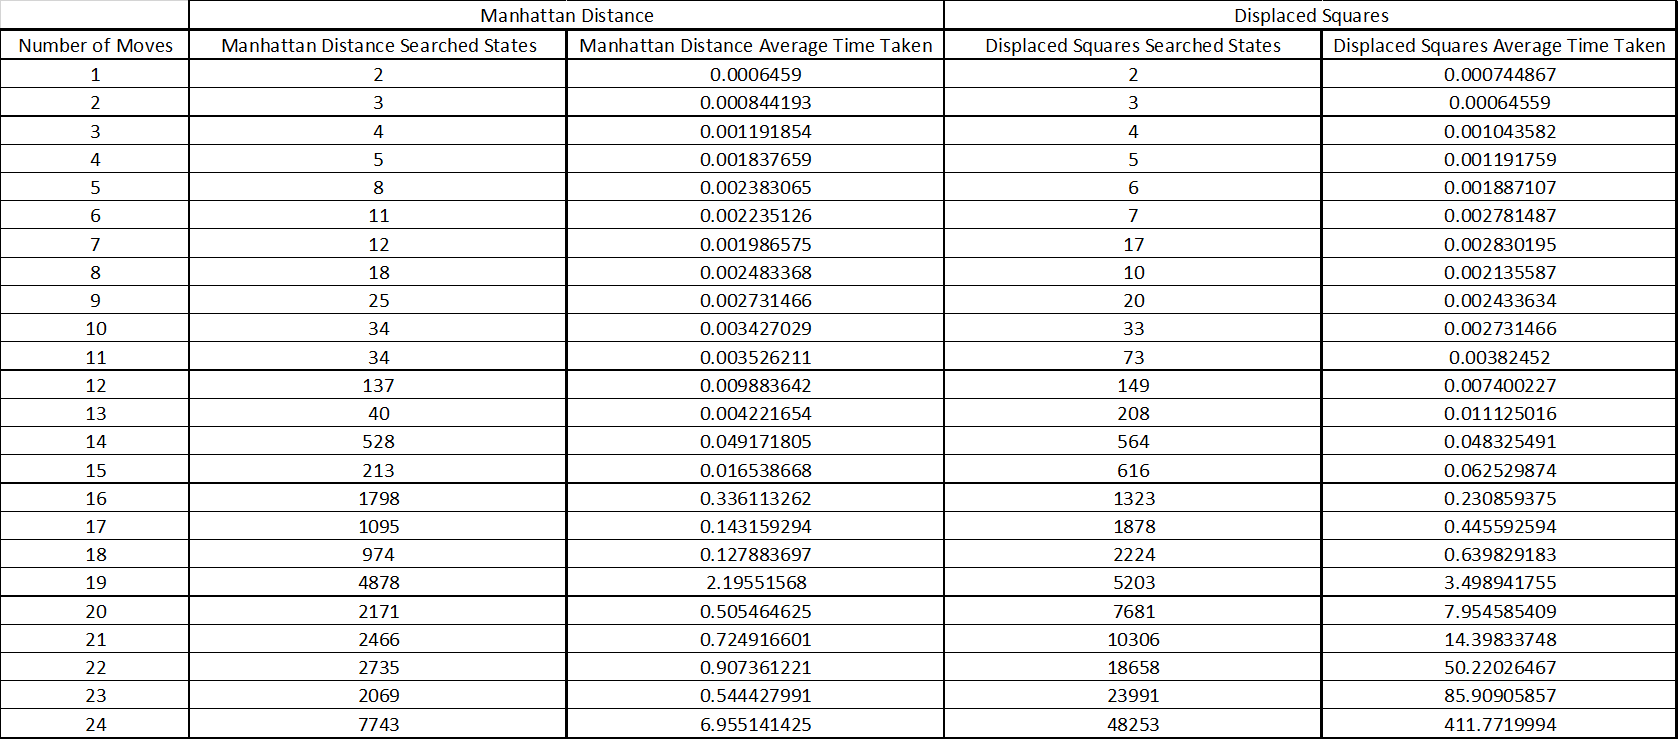

<table><tr>
<td><img src="Average 8 Puzzle Search States.png" width=100% height=100%/></td>
<td><img src="Average 8 Puzzle Solving Times.png" width=100% height=100%/></td>
</tr></table>

Question 1.3: General solution of the 8-puzzle using A⋆

The code cannot solve any pair of configurations due to the limitations of puzzle itself. Only half of the 9! possible initial states in the 8 puzzle can be used to reach a specific goal. This is due to inversion where two spaces in a puzzle are in opposite positions required in order to solve the 8 puzzle, since the opposing tiles are blocked from their goal positions. Therefore, if the initial state is an inversion of the search states, the configuration cannot be solved

In [ ]:
import random
import time

class State:
    def __init__(self, state, cost, level, parent):
        self.state = state #Puzzle state
        self.cost = cost #Heuristic cost
        self.level = level #State tree depth
        self.parent = parent #Parent state
        self.children = [] #Children States

    def searchStates(self):
        children = []
        for i in range(9): #Checks all values in the state
            if self.state[i] == "0": #Finds the empty state
                row = int(i / 3)
                column = i % 3
                shifts = self.findShifts(row, column) #Finds directions the blank space can move and how it is moved
                for shift in shifts:
                    #Creates a copy of the current state so newState does not effect the currentState
                    newState = self.state.copy()
                    newState[i] = newState[i+shift] #Change 0 into number in shift position
                    newState[i+shift] = "0" #Change number in shift position to 0
                    childState = State(newState, self.level + heuristic(method, newState), self.level+1, self)
                    children.append(childState)
        return children

    def showSolution(self, solution):
        if self.parent == None: #Checks if the root of the solution tree is reached
            return solution
        else:
            #Recursively builds solution path by adding themselves to the solution and visiting the parent node
            solution.insert(0,self.state) 
            return self.parent.showSolution(solution)

    def shuffle(self, shifts):
        shift = 0
        for i in range(shifts):
            for j in range(9):
                if self.state[j] == "0":
                    row = int(j / 3)
                    column = j % 3
                    validShifts = self.findShifts(row, column) #Finds the possible shifts from the current state
                    if shift != 0:
                        validShifts.remove(shift*-1) #Removes shift option to return to the previous state
                    shift = random.choice(validShifts) #Randomly chooses a valid shift to make
                    self.state[j] = self.state[j+shift]
                    self.state[j+shift] = "0"
                    break

    def findShifts(self, row, column):
        shifts = []
        if row == 0:
            shifts.append(3) #Down shifts list by 3
        elif row == 2:
            shifts.append(-3) #Up shifts list by -3
        else:
            shifts.extend([-3,3])
        if column == 0:
            shifts.append(1) #Right shifts list by 1
        elif column == 2:
            shifts.append(-1) #Left shifts list by -1
        else:
            shifts.extend([-1,1])
        return shifts

def showBoard(board):
    for i in range(9):
        if board[i] == "0": #Replaces 0 values used for calculations to '_'
            board[i] = "_"
            print(board[0] + "|" + board[1] + "|" + board[2] + "\n" + board[3] + "|" + board[4] + "|" + board[5] + "\n" + board[6] + "|" + board[7] + "|" + board[8] + "\n")
            board[i] = "0"
            return

def calcManhattanDistance(state):
    distance = 0
    for i in range(9): #Checks each value found in the puzzle
        row = int(i / 3)
        column = i % 3
        for j in range(9): #Goes through goal state to find the same value
            if state[i] == goal[j]:
                goalRow = int(j / 3)
                goalColumn = j % 3
                #Calculates the distance of a value from the goal by the difference of rows and columns
                distance += (abs(row-goalRow) + abs(column - goalColumn))
    return distance

def calcDisplacedSquares(state):
    misplaced = 0
    for i in range(9): #Checks every square in the puzzle
        if state[i] != goal[i]: #Increases heuristic by 1 if the value in the space is not the goal value
            misplaced += 1
    return misplaced

def heuristic(method, state):
    if method == "Manhattan Distance":
        return calcManhattanDistance(state)
    if method == "Displaced Squares":
        return calcDisplacedSquares(state)

def solvePuzzle(method, puzzle):
    startTime = time.time()

    openList = []
    closedList = []

    openList.append(puzzle)

    #print("Starting Cost: " + str(heuristic(method, puzzle.state)))

    goalFound = False
    while goalFound == False:
        closedList.append(openList[0]) 
        currentState = openList.pop(0)
        if heuristic(method, currentState.state) == 0: #Checks if solution is reached
            print("Solution:")
            showBoard(puzzle.state)
            for state in currentState.showSolution([]): #Shows every state in the solution
                showBoard(state)
            print("Total Moves:" + str(len(currentState.showSolution([]))))
            print("Searched States:" + str(len(closedList)))
            endTime = time.time()
            print("Time Taken:" + str(endTime-startTime))
            return
        for i in currentState.searchStates():
            openStates = [states.state for states in openList] #Get list of states from all openList State objects
            closedStates = [states.state for states in closedList] #Get list of states from all closedList State objects
            if i.state not in openStates or i.state not in closedStates: #Check is a new state has already been searched
                # print("Current Total Cost: " + str(i.cost) + "\nCurrent Cost: " + str(heuristic(method, i.state)) + "\nCurrent Level: " + str(i.level) + "\n")
                # showBoard(i.state)
                openList.append(i)
            elif i.state in openStates:
                #Checks if the new state is reached in less moves than the previous state and replaces it if so
                if i.cost < openList[openStates.index(i.state)].cost: 
                    # print("Open Copy")
                    # print("Current Total Cost: " + str(i.cost) + "\nCurrent Cost: " + str(heuristic(method, i.state)) + "\nCurrent Level: " + str(i.level) + "\n")
                    # showBoard(i.state)
                    openList.remove(openList[openStates.index(i.state)])
                    openList.append(i)
            else:
                #Checks if the new state is reached in less moves than the previous state and moves the new state to the 
                #openList it if so, removing the old state from the closed list
                if i.cost < closedList[closedStates.index(i.state)].cost: 
                    # print("Closed Copy")
                    # print("Current Total Cost: " + str(i.cost) + "\nCurrent Cost: " + str(heuristic(method, i.state)) + "\nCurrent Level: " + str(i.level) + "\n")
                    # showBoard(i.state)
                    closedList.remove(closedList[closedStates.index(i.state)])
                    openList.append(i)
            openList.sort(key = lambda x:x.cost)

goal = ["0","1","2",
        "3","4","5",
        "6","7","8"]

running = True
while running == True:
    option = 0
    goalChosen = False
    print("\nWould you like you initialise your own goal or use the preset goal?")
    print("1) Initialise Goal")
    print("2) Preset Goal")
    print("3) Exit")
    option = input("Select Option: ")
    if option == "1":
        try:
            goal = []
            print("Please input your goal in the form numbers 0-8 separated by spaces where 0 is the black space:")
            while len(goal) < 9: #Asks for inputs until there are 9 values in the goal
                goal += input().split()
            puzzleValues = ["0","1","2","3","4","5","6","7","8"] #Values that should be in the puzzle
            for i in range(9): 
                #Removes input values from the puzzle values, if there is a repeat or value outside the set, 
                #an exception would be thrown 
                puzzleValues.remove(goal[i])
            goalChosen = True
            print("\nGoal:")
            showBoard(goal)
        except:
            print("Invalid Goal")
    elif option == "2":
        goal = ["0","1","2",
                "3","4","5",
                "6","7","8"]
        goalChosen = True
        print("\nGoal:")
        showBoard(goal)
    elif option == "3":
        quit()
    else:
        print("Invalid Option Selected")

    if goalChosen == True:
        puzzleChosen = False
        while puzzleChosen == False:
            print("Would you like to initialise your puzzle or use a randomised puzzle from the goal?")
            print("1) Initialise Puzzle")
            print("2) Randomise Puzzle")
            print("3) Return")
            print("4) Exit")
            option = input("Select Option: ")
            if option == "1":
                try:
                    initialisedPuzzle = []
                    print("Please input your puzzle in the form numbers 0-8 separated by spaces where 0 is the black space:")
                    while len(initialisedPuzzle) < 9: #Asks for inputs until there are 9 values in the goal
                        initialisedPuzzle += input().split()
                    puzzleValues = ["0","1","2","3","4","5","6","7","8"] #Values that should be in the puzzle
                    #Removes input values from the puzzle values, if there is a repeat or value outside the set, 
                    #an exception would be thrown 
                    for i in range(9): 
                        puzzleValues.remove(initialisedPuzzle[i])                        
                    puzzle = State(initialisedPuzzle, 0, 0, None)
                    puzzleChosen = True
                    print("\nPuzzle:")
                    showBoard(puzzle.state)
                except:
                    print("Invalid Puzzle")
            elif option == "2":
                try:
                    shifts = input("Number of shuffles from the goal state: ")
                    randomise = goal.copy() #Makes a copy of the goal so the goal is not changed by reference
                    puzzle = State(randomise, 0, 0, None)
                    puzzle.shuffle(int(shifts)) #Shuffle the goal state according to the number of shifts
                    puzzleChosen = True
                    print("\nPuzzle:")
                    showBoard(puzzle.state)
                except:
                    print("Number of shuffles must be an integer")
            elif option == "3":
                break
            elif option == "4":
                quit()
            else:
                print("Invalid Option Selected")
            if puzzleChosen == True:
                method = ""
                while method == "":
                    print("What heuristic do you want to use to solve the puzzle?")
                    print("1) Manhattan Distance")
                    print("2) Displaced Squares")
                    print("3) Return")
                    print("4) Exit")
                    option = input("Select Option: ")
                    if option == "1":
                        method = "Manhattan Distance"
                    elif option == "2":
                        method = "Displaced Squares"
                    elif option == "3":
                        puzzleChosen = False
                        break
                    elif option == "4":
                        quit()
                    else:
                        print("Invalid Option Selected")
                if method != "":
                    solvePuzzle(method, puzzle)


Would you like you initialise your own goal or use the preset goal?
1) Initialise Goal
2) Preset Goal
3) Exit


# Question 2 | Evolutionary Algorithm.

Question 2.1: Design and implement the Sudoko problem using Evolutionary algorithm.

1a) Choose an appropriate solution space and solution representation.

The solution representation phenotype is a 9x9 grid that is split into 9 3x3 sectors where all of the 81 boxes in the grid contain a value from 1-9. This phenotype can be broken down into a string of values, with each value in the grid from the top left to right, traversing back down one space reading from left to right once again at the end of the row. This can be implemented as a string, however, in the interest of making the code easier to understand and traverse, a 2D array where the solution is a list of rows should be used. The solution space is the population of solutions to interact with, implemented as a list of solutions.

1b) Define an appropriate fitness function.

Following the rules of sudoku where the rows, columns and sectors of the grid must only contain the values from 1-9 once. The fitness function should increase the fitness of a solution by 1 according to the number of duplicated values in each row, column and sector.

1c) Define a crossover operator for the chosen representation.

The crossover operator will randomly take 2 individuals from the population and for every row in the grid, a corresponding row from either individual will be randomly used to form a new individual.

1d) Define a mutation operator for the chosen representation.

The mutation operator will have two different mutations that may occur depending on the recent best fit. The first mutation will traverse through all of the values in an individual and if a randomly selected value is within the mutation rate, the value would be randomised to a value other than the original value. This mutation would mainly be used to ensure as many of the values in each row, column and sector are reasonable unique so the chance of this mutation occurring should be higher at the beginning and decrease closer to the correct solution. 
The second function which has the opposite chances to the first mutation of occurring. This mutation will swap two values in a row in order to counter fitness peaks, as within local maxima, it would be difficult for correctly mutated randomised values to remain in a new population of solutions since it would probably cause many value collisions. A swap would maintain uniqueness within a row and be more likely to remain in the newly selected population.

1e) Decide how to initialise the population.

The population will be initialised by creating a copy of the puzzle to be solved for every new solution, every value int the copied puzzle will then be checked for spaces without values and randomly populated with a random value from 1-9. This is repeated until the specified population size is reached.

1f) Decide selection and replacement methods.

The individuals in the current population would be sorted by fitness value and according to the chosen truncation rate, a percentage of the best individuals in the population would be selected for a mating pool. 
The population is then replaced by an offspring population that has been mutated according to the mutation operator. The number of offsprings are generated according to the preset population size where each offspring is a cross over of two randomly selected solutions from the mating pool. 

1g) Choose an appropriate termination criterion.

An appropriate termination criterion is a best fit that is less than 4. This allows the performance of the evolutionary algorithm to be tested reasonably in terms of time to reach a certain fitness, along with the analysis of the effects of population size. This is due to the fact that at lower fitnesses, finding the perfect solution has a very large element of chance involved, such as having a good initial population in order to immediately enact a hill-climbing search toward the optimal solution or mutating towards the correct fitness peak. Being stuck on a local maxima consumes a significant amount of time, therefore, a termination criterion of 0 would not represent the actual learning power of the algorithm too a high degree of accuracy. A termination criterion of 4 minimises the effects of luck and allows testing to be done in a more reasonable time span.

2)

In [ ]:
from random import choice, random, shuffle
import copy
import time

### EVOLUTIONARY ALGORITHM ###

def evolve():
    startTime = time.time()
    population = create_pop() #Initialise Population
    fitness_population = evaluate_pop(population)
    
    previous_best_fit = 0 #Records the previous best fit
    fit_count = 0 #Records the the generations the fit count has been constant
    
    lowest_best_fit = 100 #For testing according to generation, recording the lowest best fit
    lowest_gen = 0 #Records the generation number with the lowest best fit
    best_solution = [] #Records the solution with the lowest best fit
    
    best_fit = 10 #Preset best_fit for solving according to best fit
    gen = 1
    while best_fit > BEST_FIT_GOAL: #Sets range of best_fit to stop at
        gen += 1 #Records generation for best fit setting
        
    #for gen in range(NUMBER_GENERATION): #To test via generations
        mating_pool = select_pop(population, fitness_population)
        offspring_population = crossover_pop(mating_pool)
        population = mutate_pop(offspring_population, best_fit)
        fitness_population = evaluate_pop(population)
        best_ind, best_fit = best_pop(population, fitness_population)

        if best_fit == previous_best_fit: #Counts when how many generations, the best fit has stayed constant
            fit_count += 1
        else:
            previous_best_fit = best_fit 
            fit_count = 0
        if fit_count == 500: #Checks is board has become stagnant and resets the population if so.
            population = create_pop() 
            fitness_population = evaluate_pop(population)
            fit_count = 0
            print("RESET")
        if lowest_best_fit > best_fit: #Checks if new best fit is lower than the previous best fit
            lowest_best_fit = best_fit #Records the new lowest
            lowest_gen = gen
            best_solution = best_ind

        if gen % 500 == 0: #Shows best individuals in the set intervals
            print("#%3d" % gen, "Fit: %3d" % best_fit)
            showPuzzle(best_ind)
    endTime = time.time()
    
    print("Terminating Individual:")
    print("#%3d" % gen, "Fit:%3d" % best_fit, "Time Taken:%3d" % (endTime-startTime)) #Shows the termination solution
    showPuzzle(best_ind)
    
    print("Overall Best Individual:")
    print("#%3d" % lowest_gen, "Lowest Fit: %3d" % lowest_best_fit, "Time Taken: %3d" % (endTime-startTime))
    showPuzzle(best_solution)
    
def showPuzzle(individual):
    puzzleString = ""
    puzzleString += "╔" + "═══════════╦" * 2 + "═══════════" + "╗\n" #Top bar
    for i in range(81):
        if (i % 27) == 0 and i>0 and i<81: #Sector rows
            puzzleString += "║\n╠" + "═══════════╬" * 2 + "═══════════" + "╣\n║"
        elif (i % 9) == 0 and i != 0: #Sector value dividers
            puzzleString += "║\n║" + "───┼───┼───║" * 3 + "\n║"
        elif (i % 3) == 0: #Sector Columns
            puzzleString += "║"
        if (i % 3) == 1 or (i % 3) == 4 or (i % 3) == 7:
            # print("Row: " + str(int(i / 9)) + "Column: " + str(i % 9))
            puzzleString += "│ " + individual[int(i / 9)][i % 9] + " │"
        else:
            puzzleString += " " + individual[int(i / 9)][i % 9] + " "
    puzzleString += "║\n╚" + "═══════════╩" * 2 + "═══════════" + "╝"
    puzzleString= puzzleString.replace("_", " ")
    print(puzzleString)

### POPULATION-LEVEL OPERATORS ###

def create_pop():
    return [ create_ind() for _ in range(POPULATION_SIZE) ]

def evaluate_pop(population):
    return [ evaluate_ind(individual) for individual in population ]

def select_pop(population, fitness_population):
    sorted_population = sorted(zip(population, fitness_population), key = lambda ind_fit: ind_fit[1])
    return [ individual for individual, fitness in sorted_population[:int(POPULATION_SIZE * TRUNCATION_RATE)] ]

def crossover_pop(population):
    return [ crossover_ind(choice(population), choice(population)) for _ in range(POPULATION_SIZE) ]

def mutate_pop(population, best_fit):
    return [ mutate_ind(individual, best_fit) for individual in population ]

def best_pop(population, fitness_population):
    return sorted(zip(population, fitness_population), key = lambda ind_fit: ind_fit[1])[0]

### INDIVIDUAL-LEVEL OPERATORS: REPRESENTATION & PROBLEM SPECIFIC ###

numbers = "123456789"
puzzle1 =   [['3', '_', '_', '_', '_', '5', '_', '4', '7'], 
            ['_', '_', '6', '_', '4', '2', '_', '_', '1'], 
            ['_', '_', '_', '_', '_', '7', '8', '9', '_'], 
            ['_', '5', '_', '_', '1', '6', '_', '_', '2'], 
            ['_', '_', '3', '_', '_', '_', '_', '_', '4'],
            ['8', '1', '_', '_', '_', '_', '7', '_', '_'], 
            ['_', '_', '2', '_', '_', '_', '4', '_', '_'], 
            ['5', '6', '_', '8', '7', '_', '1', '_', '_'], 
            ['_', '_', '_', '3', '_', '_', '6', '_', '_']]

puzzle2 =   [['_', '_', '2', '_', '_', '_', '6', '3', '4'], 
            ['1', '_', '6', '_', '_', '_', '5', '8', '_'], 
            ['_', '_', '7', '3', '_', '_', '2', '9', '_'], 
            ['_', '8', '5', '_', '_', '1', '_', '_', '6'], 
            ['_', '_', '_', '7', '5', '_', '_', '2', '3'], 
            ['_', '_', '3', '_', '_', '_', '_', '5', '_'], 
            ['3', '1', '4', '_', '_', '2', '_', '_', '_'], 
            ['_', '_', '9', '_', '8', '_', '4', '_', '_'], 
            ['7', '2', '_', '_', '4', '_', '_', '_', '9']]

puzzle3 =   [['_', '_', '4', '_', '1', '_', '_', '6', '_'], 
            ['9', '_', '_', '_', '_', '_', '_', '3', '_'], 
            ['_', '5', '_', '7', '9', '6', '_', '_', '_'], 
            ['_', '_', '2', '5', '_', '4', '9', '_', '_'], 
            ['_', '8', '3', '_', '6', '_', '_', '_', '_'], 
            ['_', '_', '_', '_', '_', '_', '6', '_', '7'], 
            ['_', '_', '_', '9', '_', '3', '_', '7', '_'], 
            ['_', '_', '_', '_', '_', '_', '_', '_', '_'], 
            ['_', '_', '6', '_', '_', '_', '_', '1', '_']]

def create_ind():
    individual = copy.deepcopy(puzzle)
    for row in range(9):
        for column in range(9):
            if puzzle[row][column] == "_": #Checks if value is changeable by checking blank spaces in original puzzle
                individual[row][column] = choice(numbers) #Assigns random valid number to position
    return individual

def evaluate_ind(individual):
    fitness = 0
    for row in range(9):
        fitness += 9 - len(set(individual[row])) #Finds unique values in a row and therefore finds the number of duplicates to add to the fitness
    for column in range(9):
        fitness += 9 - len(set([row[column] for row in individual])) #Finds unique values in a column and therefore finds the number of duplicates to add to the fitness
    for sectorRow in range(0, 6, 3): #Goes through starting values of sectors
        for sectorColumn in range(0, 6, 3):
            sectorValues= []
            for sectorRowValue in range(3): #Goes through all values in the sector
                for sectorColumnValue in range(3):
                    sectorValues.append(individual[sectorRow+sectorRowValue][sectorColumn+sectorColumnValue]) #Adds each value to the list of sector values
            fitness += 9 - len(set(sectorValues)) #Finds unique values in a sector and therefore finds the number of duplicates to add to the fitness
    return fitness

def crossover_ind(individual1, individual2):
    newIndividual = [] #Initialised individual to return
    for ch_pair in zip(individual1, individual2): #Pairs rows of two chosen individuals
        newIndividual.append(choice(ch_pair)) 
    return newIndividual

def mutate_ind(individual, best_fit):
    newIndividual = copy.deepcopy(individual)
    if best_fit < 5: #Makes best fit at least 5 make the chances of randomising a value stay at leat 20%
        best_fit = 5
    if random() > (4/best_fit): #As the best fit increases, the chances of swapping values rather than randomising increases to a maximum of 80%
        for row in range(9): #Goes through all values in puzzle
            for column in range(9):
                if random() < MUTATION_RATE and puzzle[row][column] == "_": #Checks if a value should be randomised and checks if the value is blank in the original puzzle to allow for changes
                    original = newIndividual[row][column] #Records the original value
                    while newIndividual[row][column] == original: #Ensures the value changes
                        newIndividual[row][column] = choice(numbers)
    else:
        for row in range(9):
            if random() < 1/9: #Chances to swap values is 1/Number of rows
                swappable = []
                for column in range(9):
                    if puzzle[row][column] == "_": #Appends column numbers of swappable values according to the original puzzle
                        swappable.append(column)
                if len(swappable) > 1: #If there are more than 1 swappable columns, swap the values
                    shuffle(swappable, random) #Randomises the list of swappable columns
                    individual[row][swappable[0]], individual[row][swappable[1]] = individual[row][swappable[1]], individual[row][swappable[0]] #Swap the 1st and 2nd columns in the randomised list
    return newIndividual

### PARAMERS VALUES ###

individual_size = 81
NUMBER_GENERATION = 1000
POPULATION_SIZE = 100
TRUNCATION_RATE = 0.5
MUTATION_RATE = 0.5 / individual_size
BEST_FIT_GOAL = 4

### EVOLVE! ###
running = True
while running == True:
    puzzleChosen = False
    option = 0
    print("Please select a sudoku puzzle to solve")
    print("1) Grid 1:")
    showPuzzle(puzzle1)
    print("2) Grid 2:")
    showPuzzle(puzzle2)
    print("3) Grid 3:")
    showPuzzle(puzzle3)
    print("4) Exit")
    option = input("Select Option: ")
    if option == "1":
        puzzle = puzzle1
        puzzleChosen = True
    elif option == "2":
        puzzle = puzzle2
        puzzleChosen = True
    elif option == "3":
        puzzle = puzzle3
        puzzleChosen = True
    elif option == "4":
        quit()
    else:
        print("Invalid Input")
    if puzzleChosen == True:
        individual_size = len([puzzle[row][column] for row in range(9) for column in range(9) if puzzle[row][column] == "_"])
        evolve()
        done = False
        while done == False:
            option = input("Would you like to solve another puzzle? Y/N\n")
            if option.lower() == "y" or option.lower() == "yes":
                break
            elif option.lower() == "n" or option.lower() == "no":
                quit()


Please select a sudoku puzzle to solve
1) Grid 1:
╔═══════════╦═══════════╦═══════════╗
║ 3 │   │   ║   │   │ 5 ║   │ 4 │ 7 ║
║───┼───┼───║───┼───┼───║───┼───┼───║
║   │   │ 6 ║   │ 4 │ 2 ║   │   │ 1 ║
║───┼───┼───║───┼───┼───║───┼───┼───║
║   │   │   ║   │   │ 7 ║ 8 │ 9 │   ║
╠═══════════╬═══════════╬═══════════╣
║   │ 5 │   ║   │ 1 │ 6 ║   │   │ 2 ║
║───┼───┼───║───┼───┼───║───┼───┼───║
║   │   │ 3 ║   │   │   ║   │   │ 4 ║
║───┼───┼───║───┼───┼───║───┼───┼───║
║ 8 │ 1 │   ║   │   │   ║ 7 │   │   ║
╠═══════════╬═══════════╬═══════════╣
║   │   │ 2 ║   │   │   ║ 4 │   │   ║
║───┼───┼───║───┼───┼───║───┼───┼───║
║ 5 │ 6 │   ║ 8 │ 7 │   ║ 1 │   │   ║
║───┼───┼───║───┼───┼───║───┼───┼───║
║   │   │   ║ 3 │   │   ║ 6 │   │   ║
╚═══════════╩═══════════╩═══════════╝
2) Grid 2:
╔═══════════╦═══════════╦═══════════╗
║   │   │ 2 ║   │   │   ║ 6 │ 3 │ 4 ║
║───┼───┼───║───┼───┼───║───┼───┼───║
║ 1 │   │ 6 ║   │   │   ║ 5 │ 8 │   ║
║───┼───┼───║───┼───┼───║───┼───┼───║
║   │   │ 7 ║ 3 │   │   ║ 2

C:\Users\Andrew Yau\AppData\Local\Temp\ipykernel_28492\1761960456.py:180: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  shuffle(swappable, random) #Randomises the list of swappable columns


#500 Fit:  10
╔═══════════╦═══════════╦═══════════╗
║ 2 │ 3 │ 4 ║ 4 │ 1 │ 9 ║ 7 │ 6 │ 8 ║
║───┼───┼───║───┼───┼───║───┼───┼───║
║ 9 │ 6 │ 1 ║ 8 │ 7 │ 5 ║ 2 │ 3 │ 4 ║
║───┼───┼───║───┼───┼───║───┼───┼───║
║ 8 │ 5 │ 7 ║ 7 │ 9 │ 6 ║ 3 │ 2 │ 4 ║
╠═══════════╬═══════════╬═══════════╣
║ 6 │ 7 │ 2 ║ 5 │ 3 │ 4 ║ 9 │ 8 │ 1 ║
║───┼───┼───║───┼───┼───║───┼───┼───║
║ 1 │ 8 │ 3 ║ 2 │ 6 │ 7 ║ 5 │ 4 │ 9 ║
║───┼───┼───║───┼───┼───║───┼───┼───║
║ 5 │ 4 │ 9 ║ 1 │ 2 │ 8 ║ 6 │ 9 │ 7 ║
╠═══════════╬═══════════╬═══════════╣
║ 2 │ 1 │ 5 ║ 9 │ 8 │ 3 ║ 4 │ 7 │ 6 ║
║───┼───┼───║───┼───┼───║───┼───┼───║
║ 4 │ 9 │ 8 ║ 6 │ 5 │ 2 ║ 1 │ 5 │ 3 ║
║───┼───┼───║───┼───┼───║───┼───┼───║
║ 7 │ 2 │ 6 ║ 3 │ 4 │ 9 ║ 8 │ 1 │ 5 ║
╚═══════════╩═══════════╩═══════════╝
#1000 Fit:   9
╔═══════════╦═══════════╦═══════════╗
║ 2 │ 3 │ 4 ║ 4 │ 1 │ 5 ║ 7 │ 6 │ 8 ║
║───┼───┼───║───┼───┼───║───┼───┼───║
║ 9 │ 6 │ 1 ║ 8 │ 7 │ 5 ║ 4 │ 3 │ 2 ║
║───┼───┼───║───┼───┼───║───┼───┼───║
║ 8 │ 5 │ 7 ║ 7 │ 9 │ 6 ║ 3 │ 2 │ 4 ║
╠═══════════╬════════

#6500 Fit:  10
╔═══════════╦═══════════╦═══════════╗
║ 6 │ 2 │ 4 ║ 3 │ 1 │ 8 ║ 5 │ 6 │ 9 ║
║───┼───┼───║───┼───┼───║───┼───┼───║
║ 9 │ 7 │ 1 ║ 8 │ 4 │ 2 ║ 4 │ 3 │ 5 ║
║───┼───┼───║───┼───┼───║───┼───┼───║
║ 3 │ 5 │ 8 ║ 7 │ 9 │ 6 ║ 1 │ 4 │ 2 ║
╠═══════════╬═══════════╬═══════════╣
║ 5 │ 6 │ 2 ║ 5 │ 8 │ 4 ║ 9 │ 2 │ 3 ║
║───┼───┼───║───┼───┼───║───┼───┼───║
║ 1 │ 8 │ 3 ║ 2 │ 6 │ 9 ║ 7 │ 5 │ 4 ║
║───┼───┼───║───┼───┼───║───┼───┼───║
║ 4 │ 9 │ 7 ║ 1 │ 3 │ 7 ║ 6 │ 8 │ 7 ║
╠═══════════╬═══════════╬═══════════╣
║ 2 │ 1 │ 4 ║ 9 │ 5 │ 3 ║ 8 │ 7 │ 6 ║
║───┼───┼───║───┼───┼───║───┼───┼───║
║ 8 │ 3 │ 5 ║ 6 │ 7 │ 4 ║ 2 │ 9 │ 1 ║
║───┼───┼───║───┼───┼───║───┼───┼───║
║ 7 │ 4 │ 6 ║ 9 │ 2 │ 5 ║ 3 │ 1 │ 8 ║
╚═══════════╩═══════════╩═══════════╝
#7000 Fit:  14
╔═══════════╦═══════════╦═══════════╗
║ 2 │ 9 │ 4 ║ 4 │ 1 │ 3 ║ 8 │ 6 │ 5 ║
║───┼───┼───║───┼───┼───║───┼───┼───║
║ 9 │ 1 │ 7 ║ 2 │ 8 │ 5 ║ 3 │ 3 │ 6 ║
║───┼───┼───║───┼───┼───║───┼───┼───║
║ 8 │ 5 │ 1 ║ 7 │ 9 │ 6 ║ 2 │ 4 │ 3 ║
╠═══════════╬═══════

Evolutionary Algorithm Results:
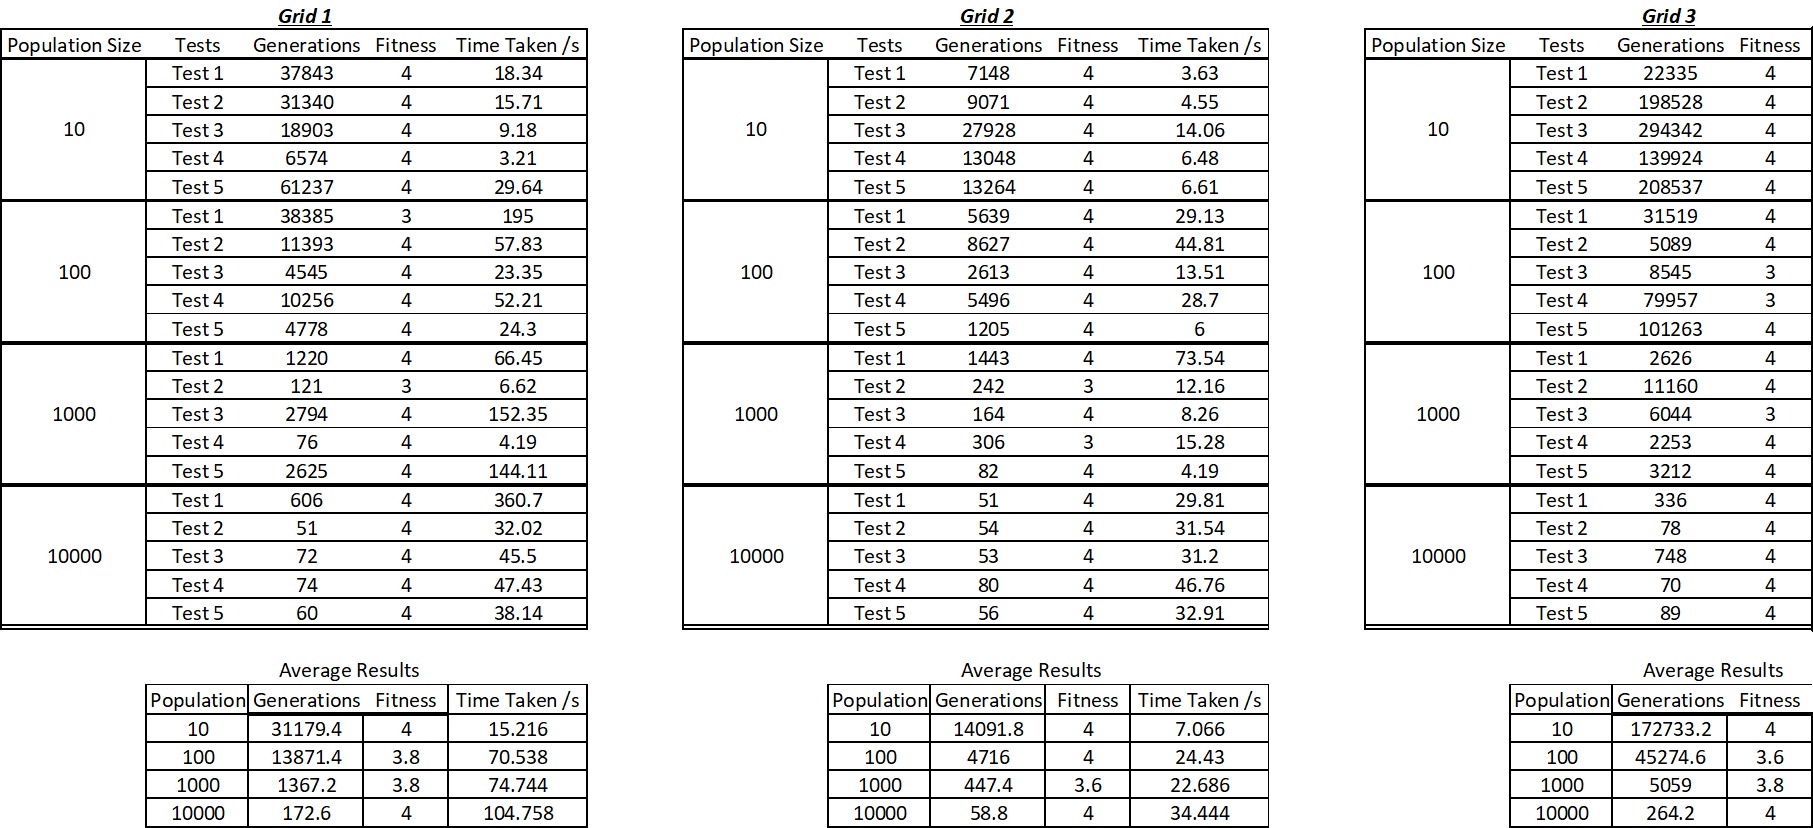

<table><tr>
<td><img src="Grid1.png" width=100% height=100%/></td>
<td><img src="Grid2.png" width=100% height=100% /></td>
<td><img src="Grid3.png" width=100% height=100% /></td>
</tr></table>

Question 2.2: Analysis the Sudoko problem using Evolutionary algorithm.
1) What population size was the best?

A population size of 10 showed the best performance. According to all the graphs for 'Grid 1, Grid 2 and Grid 3' the average time taken is at least 3 times more efficient than the population sizes of all other sizes excluding the population size of 10000 for grid 3. 

2) What do you think is the reason for your findings in question 8.a?

Sudoku is a puzzle with a single solution, however, there are a significant number of local maxima where the fitness of the solutions follow the rules of the puzzle, converging towards a solution that has one or two incorrect values in the current covergence. 

This actually means that this solution is multiple values from the actual solution to the problem, as although most of the rows, columns and sectors have unique values, several values must be shifted to make space for a non-duplicated value to appear in the conflicting position. The actual correct value for the conflicting position would cause a multitude of collisions in other areas, drastically increasing the fitness of the solution, making it unlikely for the correct value to remain through the next population selection despite being correct.
This is the hill-climbing problem where the convergence is stuck in a local minima and cannot escape and converge to a different solution.

My implementation of the evolutionary algorithm utilises a truncation rate of 0.5. This means that only the best 5 individuals of every population are used to populate the next population for a population size of 10. This is advantageous to the sudoku puzzle, minimising the hill-climbing problem, as a population evolved from 5 individuals are unlikely to be similar after crossovers and mutations which also means the solutions have a weak convergance towards a local maxima. This leaves the evolutionary algorithm to freely explore the fitness landscape.
A larger population would have more values converging towards the same local maxima and once most of the solutions are at it's fitness peak, the majority of the evolving solutions with the best fit that will be carried to the next population are based around the wrong peak, while a much lower fitness is required to escape the maxima. The diversity of the solutions has reduced to a point where evolution towards the correct peak is difficult.

3) Which grid was the easiest and which the hardest to solve?

Grid 2 was the easiest to solve whilst grid 3 was the hardest to solve. This can be inferred as generally, the average times taken for Grid 3 are approximately an order of magnitude longer than the other Grids.

4) What do you think might be the reason for your findings in question 8.c?

Grid 3's puzzle fundamentally provides far less information to the evolutionary algorithm than the other two grids and Grid 2 vice versa. This is due to the fact that Grid 3 only provides 23 initial values in the puzzle, whilst Grid 1 provide 29 values and Grid 2 provides 33. A higher number of initial values of Grid 2 does not only enable the grid to require searching for 10 values less than Grid 3, but it also adds 10 new restrictions to what the values in the same row, column or sector could be in order to remain unique. 

5) What further experiments do you think it may be useful to do and why?

In order to combat the detriment of local maxima, I implemented a method to record the number of generations that the best fitness has stayed constant and resets the entire population if the best fitness has been constant for 500 generations. However, rather than fully reseting the population, it may be more useful to explore increasing the mutation rate depending on the number of generations with a constant best fitness in order to escape a fitness peak. This would allow the evolutionary algorithm to immediately search a larger range of the fitness landscape with a decent amount of information remaining and more generations are not required to reach the same point after reseting.

The results obtained by 5 tests has proved to be somewhat insufficient as although a general trend can be inferred by the average data obtained, the correlation is not very strong. The results for the populations sized 100 and 1000 possess similar average times taken within each grid so more tests should make their relationships clearer. The average for the population size 10000 in Grid 3 is lower than the population sizes of 100 and 1000. According to the trend in grids 1 and 2 where the times taken are significantly higher than the other population sizes, this value should also be higher suggesting, the tests were luckily initialised or converged to very early. Further tests to completely confirm this trend would be beneficial.